## Análisis de datos - Clase 1

### Carga de datos y visualización rápida

#### En esta notebook repasaremos distintas maneras de recolectar datos para luego procesarlos con la biblioteca Pandas.

In [79]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
from sqlalchemy import create_engine, MetaData, text
import json
from io import StringIO

In [80]:
# en Google Drive
# from google.colab import drive
# drive.mount('/content/drive')

#### 1. Cargar datos desde un archivo CSV a un df de Pandas

In [81]:

df_csv = pd.read_csv("https://people.sc.fsu.edu/~jburkardt/data/csv/airtravel.csv")

# Otros formatos comunes: pd.read_parquet, pd.read_json, pd.read_html

In [82]:
# Mostrar las primeras filas (las 5 primeras por defecto)
df_csv.head()  

,Month,"""1958""","""1959""","""1960"""
0,JAN,340,360,417
1,FEB,318,342,391
2,MAR,362,406,419
3,APR,348,396,461
4,MAY,363,420,472


In [83]:
df_csv.tail(6) # Mostrar las últimas 6 filas

,Month,"""1958""","""1959""","""1960"""
6,JUL,491,548,622
7,AUG,505,559,606
8,SEP,404,463,508
9,OCT,359,407,461
10,NOV,310,362,390
11,DEC,337,405,432


#### 2. Recolectar datos a través de una API

In [84]:

# Ejemplo: API del SMN Argentino

url_smn = "https://ws.smn.gob.ar/map_items/forecast/1" # Forecast de 1 día
response_smn = requests.get(url_smn)

if response_smn.status_code == 200:
    data_smn = response_smn.json()
    print("Se obtuvo respuesta!")
    
else:
    print(f"Se produjo un error: {response_smn.status_code}")

Se obtuvo respuesta!


In [85]:
data_smn[:2]

[{'_id': '609d947e818e15902c74d831',
  'dist': 20.55,
  'lid': 9539,
  'fid': 9539,
  'name': 'Tunuyan',
  'province': 'Mendoza',
  'lat': '-33.58210373',
  'lon': '-69.02268982',
  'zoom': '2',
  'updated': 1557349200,
  'weather': {'day': 1,
   'morning_temp': 10,
   'morning_id': 2,
   'morning_desc': 'Cielo parcialmente nublado. Vientos leves del sector sur.',
   'afternoon_temp': 22,
   'afternoon_id': 14,
   'afternoon_desc': 'Nubosidad variable. Probabilidad de tormentas aisladas. Vientos leves del sector sur.'}},
 {'_id': '609d947e818e15902c74d836',
  'dist': 7.12,
  'lid': 9553,
  'fid': 9553,
  'name': 'San Rafael',
  'province': 'Mendoza',
  'lat': '-34.60757828',
  'lon': '-68.32798004',
  'zoom': '2',
  'updated': 1557349200,
  'weather': {'day': 1,
   'morning_temp': 13,
   'morning_id': 4,
   'morning_desc': 'Cielo nublado. Probabilidad de lluvias y tormentas, algunas fuertes. Vientos leves del sector norte, cambiando a moderados o regulares del sector sur con ráfagas.',

In [86]:
# Primera forma 

df_api_1 = pd.DataFrame(data_smn)

df_api_1.head()

,_id,dist,lid,fid,name,province,lat,lon,zoom,updated,weather
0,609d947e818e15902c74d831,20.55,9539,9539,Tunuyan,Mendoza,-33.58210373,-69.02268982,2,1557349200,"{'day': 1, 'morning_temp': 10, 'morning_id': 2..."
1,609d947e818e15902c74d836,7.12,9553,9553,San Rafael,Mendoza,-34.60757828,-68.32798004,2,1557349200,"{'day': 1, 'morning_temp': 13, 'morning_id': 4..."
2,609d947e818e15902c74d83b,77.99,9560,9560,General Alvear,Mendoza,-34.9721489,-67.68930054,2,1557349200,"{'day': 1, 'morning_temp': 11, 'morning_id': 4..."
3,609d947e818e15902c74d840,66.80,4164,4164,San Bernardo,Buenos Aires,-36.69836044,-56.67993927,2,1557306000,"{'day': 1, 'morning_temp': 12, 'morning_id': 1..."
4,609d947e818e15902c74d844,64.47,9629,9629,Apóstoles,Misiones,-27.91513062,-55.75431442,2,1557349200,"{'day': 1, 'morning_temp': 19, 'morning_id': 4..."


In [87]:
# Segunda forma 

df_api_2 = pd.json_normalize(data_smn) # Desarma los diccionarios anidados

df_api_2.head()

,_id,dist,lid,fid,name,province,lat,lon,zoom,updated,weather.day,weather.morning_temp,weather.morning_id,weather.morning_desc,weather.afternoon_temp,weather.afternoon_id,weather.afternoon_desc
0,609d947e818e15902c74d831,20.55,9539,9539,Tunuyan,Mendoza,-33.58210373,-69.02268982,2,1557349200,1,10,2,Cielo parcialmente nublado. Vientos leves del ...,22,14,Nubosidad variable. Probabilidad de tormentas ...
1,609d947e818e15902c74d836,7.12,9553,9553,San Rafael,Mendoza,-34.60757828,-68.32798004,2,1557349200,1,13,4,Cielo nublado. Probabilidad de lluvias y torme...,18,3,Nubosidad variable. Probabilidad de lluvias y ...
2,609d947e818e15902c74d83b,77.99,9560,9560,General Alvear,Mendoza,-34.9721489,-67.68930054,2,1557349200,1,11,4,Cielo nublado. Probabilidad de lluvias y torme...,20,3,Nubosidad variable. Probabilidad de lluvias y ...
3,609d947e818e15902c74d840,66.80,4164,4164,San Bernardo,Buenos Aires,-36.69836044,-56.67993927,2,1557306000,1,12,10,Nublado,19,11,Inestable con probables precipitaciones
4,609d947e818e15902c74d844,64.47,9629,9629,Apóstoles,Misiones,-27.91513062,-55.75431442,2,1557349200,1,19,4,Probables neblinas y bancos de niebla. Nubosid...,26,4,Nubosidad variable. Probabilidad de lluvias y ...


In [88]:
# Tercera forma

json_str = json.dumps(data_smn) # Convierte data_smn que es una lista
json_str_io = StringIO(json_str) # StringIO es el tipo de entrada que espera pd.read_json
df_api_3 = pd.read_json(json_str_io)

df_api_3.head()


,_id,dist,lid,fid,name,province,lat,lon,zoom,updated,weather
0,609d947e818e15902c74d831,20.55,9539,9539,Tunuyan,Mendoza,-33.582104,-69.022690,2,1557349200,"{'day': 1, 'morning_temp': 10, 'morning_id': 2..."
1,609d947e818e15902c74d836,7.12,9553,9553,San Rafael,Mendoza,-34.607578,-68.327980,2,1557349200,"{'day': 1, 'morning_temp': 13, 'morning_id': 4..."
2,609d947e818e15902c74d83b,77.99,9560,9560,General Alvear,Mendoza,-34.972149,-67.689301,2,1557349200,"{'day': 1, 'morning_temp': 11, 'morning_id': 4..."
3,609d947e818e15902c74d840,66.80,4164,4164,San Bernardo,Buenos Aires,-36.698360,-56.679939,2,1557306000,"{'day': 1, 'morning_temp': 12, 'morning_id': 1..."
4,609d947e818e15902c74d844,64.47,9629,9629,Apóstoles,Misiones,-27.915131,-55.754314,2,1557349200,"{'day': 1, 'morning_temp': 19, 'morning_id': 4..."


#### 3. Conectarse a una base de datos

In [89]:
DATABASE_URL = "sqlite:///../datasets/movie.sqlite"  # Path al archivo sqlite
engine = create_engine(DATABASE_URL)

# Obtener datos de las tablas
metadata = MetaData()
metadata.reflect(bind=engine)

print(f"Tablas disponibles en la DB:{list(metadata.tables.keys())}")


Tablas disponibles en la DB:['IMDB', 'earning', 'genre']


In [90]:
tabla_imdb = metadata.tables['IMDB'] # Tabla IMDB
print(f"Columnas disponibles en la tabla IMDB:{list(tabla_imdb.columns.keys())}")

Columnas disponibles en la tabla IMDB:['Movie_id', 'Title', 'Rating', 'TotalVotes', 'MetaCritic', 'Budget', 'Runtime', 'CVotes10', 'CVotes09', 'CVotes08', 'CVotes07', 'CVotes06', 'CVotes05', 'CVotes04', 'CVotes03', 'CVotes02', 'CVotes01', 'CVotesMale', 'CVotesFemale', 'CVotesU18', 'CVotesU18M', 'CVotesU18F', 'CVotes1829', 'CVotes1829M', 'CVotes1829F', 'CVotes3044', 'CVotes3044M', 'CVotes3044F', 'CVotes45A', 'CVotes45AM', 'CVotes45AF', 'CVotes1000', 'CVotesUS', 'CVotesnUS', 'VotesM', 'VotesF', 'VotesU18', 'VotesU18M', 'VotesU18F', 'Votes1829', 'Votes1829M', 'Votes1829F', 'Votes3044', 'Votes3044M', 'Votes3044F', 'Votes45A', 'Votes45AM', 'Votes45AF', 'VotesIMDB', 'Votes1000', 'VotesUS', 'VotesnUS']


In [91]:
# Ejemplo: creamos la query a la tabla IMDB (buscamos las películas con rating >= 7)
query_imdb = text("""
    SELECT Movie_id, Title, Rating, TotalVotes
    FROM IMDB
    WHERE Rating >= 7
""")


# Creamos la conexión
with engine.connect() as connection:
    # Cargamos el resultado de la query en un df de Pandas
    df_sql_imdb = pd.read_sql(query_imdb, connection)

# Display the first few rows
df_sql_imdb.head()

,Movie_id,Title,Rating,TotalVotes
0,36809,12 Years a Slave (2013),8.1,496092
1,30114,127 Hours (2010),7.6,297075
2,37367,50/50 (2011),7.7,283935
3,49473,About Time (2013),7.8,225412
4,14867,Amour (2012),7.9,76121


#### 4. Web scraping

In [92]:
# URL para hacer el scraping (títulos de libros)
url = "http://books.toscrape.com/"

# Traer el HTML
response = requests.get(url)

##--------Ejemplo simplificado del HTML-------------##
# <article class="product_pod">
#     <h3><a href="catalogue/some-book_1/index.html">Book Title</a></h3>
#     <p class="price_color">£10.99</p>
#     <p class="star-rating Three">★★★☆☆</p>
# </article>


if response.status_code == 200:
    
    # Parsear el HTML
    soup = BeautifulSoup(response.text, "html.parser") # Permite encontrar los elementos a partir de los tags
    
    # Inicializar listas para guardar los datos
    titulos = []
    precios = []
    ratings = []
    
    # Encontrar todos los artículos
    books = soup.select("article.product_pod")
    
    for book in books:
        # Extraer título
        titulo = book.select_one("h3 a").text.strip()
        titulos.append(titulo)
        
        # Extraer precio
        precio = book.select_one(".price_color").text.strip()
        precios.append(precio)
        
        # Extraer el rating
        rating_elem = book.select_one(".star-rating")
        rating = rating_elem["class"][1] 
        ratings.append(rating)
    
else:
    print(f"No se pudo capturar el HTML (Error: {response.status_code})")

In [93]:
# Crear un Pandas DataFrame a partir de las 3 listas resultantes del scraping
df_web = pd.DataFrame({
    "Titulos": titulos,
    "Precios": precios,
    "Ratings": ratings
})

df_web.head() 

,Titulos,Precios,Ratings
0,A Light in the ...,Â£51.77,Three
1,Tipping the Velvet,Â£53.74,One
2,Soumission,Â£50.10,One
3,Sharp Objects,Â£47.82,Four
4,Sapiens: A Brief History ...,Â£54.23,Five


### Introducción al análisis más detallado

1. Ejemplo con dataset "turismo.csv"

In [94]:
path="../datasets/turismo.csv"

df = pd.read_csv(path)

df.head()

,indice_tiempo,turismo_receptivo,turismo_emisivo,saldo
0,2010-01-01,254.157,162.680,91.477
1,2010-02-01,186.441,186.227,0.214
2,2010-03-01,203.821,167.262,36.559
3,2010-04-01,207.516,141.750,65.766
4,2010-05-01,191.665,154.430,37.235


2. Revisar datos faltantes y duplicados

In [95]:
print(f"Valores faltantes: {df.isnull().sum()}")  # Calcular valores faltantes


Valores faltantes: indice_tiempo        0
turismo_receptivo    0
turismo_emisivo      0
saldo                0
dtype: int64


In [96]:
print("Cantidad de datos duplicados:", df.duplicated().sum())

Cantidad de datos duplicados: 0


In [97]:
print(f"Columnas del dataframe:\n{df.dtypes}\n")

Columnas del dataframe:
indice_tiempo         object
turismo_receptivo    float64
turismo_emisivo      float64
saldo                float64
dtype: object



3. Inspeccionar y corregir tipos de datos

In [98]:
df["indice_tiempo"] = pd.to_datetime(df["indice_tiempo"])
df.dtypes

indice_tiempo        datetime64[ns]
turismo_receptivo           float64
turismo_emisivo             float64
saldo                       float64
dtype: object

#### alternativamente:

In [99]:
df = pd.read_csv(path, parse_dates = ['indice_tiempo'])
df.dtypes

indice_tiempo        datetime64[ns]
turismo_receptivo           float64
turismo_emisivo             float64
saldo                       float64
dtype: object

4. Creación de nuevas columnas

In [100]:
df["año"] = df["indice_tiempo"].dt.year
df["mes"] = df["indice_tiempo"].dt.month
df.head()

,indice_tiempo,turismo_receptivo,turismo_emisivo,saldo,año,mes
0,2010-01-01,254.157,162.680,91.477,2010,1
1,2010-02-01,186.441,186.227,0.214,2010,2
2,2010-03-01,203.821,167.262,36.559,2010,3
3,2010-04-01,207.516,141.750,65.766,2010,4
4,2010-05-01,191.665,154.430,37.235,2010,5


### Algunas visualizaciones

In [101]:
import matplotlib.pyplot as plt
import seaborn as sns

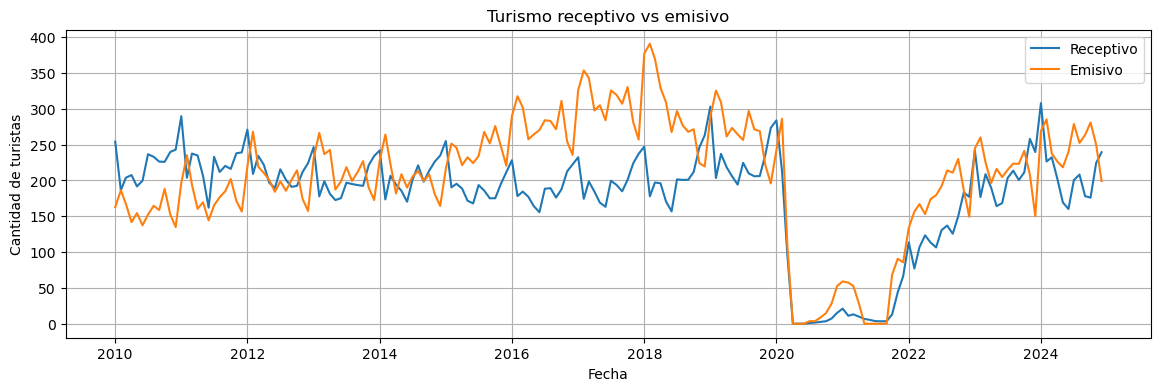

In [102]:
# Turismo receptivo vs emisivo
plt.figure(figsize=(14, 4))

plt.plot(df["indice_tiempo"], df["turismo_receptivo"], label="Receptivo")
plt.plot(df["indice_tiempo"], df["turismo_emisivo"], label="Emisivo")

# Con Seaborn
#sns.lineplot(data=df, x="indice_tiempo", y="turismo_receptivo", label="Receptivo")
#sns.lineplot(data=df, x="indice_tiempo", y="turismo_emisivo", label="Emisivo")

# Títulos y etiquetas
plt.title("Turismo receptivo vs emisivo")
plt.xlabel("Fecha")
plt.ylabel("Cantidad de turistas")
plt.legend()
plt.grid(True)

plt.show()


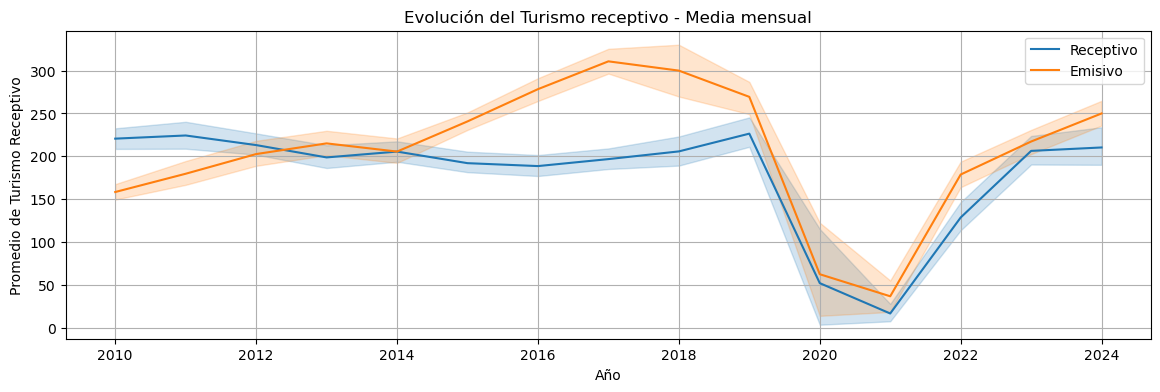

In [103]:
# Turismo receptivo vs emisivo - media mensual
plt.figure(figsize=(14, 4))
sns.lineplot(data=df, x="año", y="turismo_receptivo", label="Receptivo")
sns.lineplot(data=df, x="año", y="turismo_emisivo", label="Emisivo")

# Títulos y etiquetas
plt.title("Evolución del Turismo receptivo - Media mensual")
plt.xlabel("Año")
plt.ylabel("Promedio de Turismo Receptivo")
plt.grid(True)
plt.show()
